# First Tensorflow neural network for classification

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max()-x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Continuous Features

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [11]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [12]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

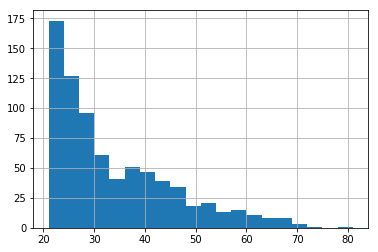

In [14]:
diabetes['Age'].hist(bins=20);

In [15]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [16]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,diabetes_pedigree,bmi,assigned_group,age_bucket]

In [17]:
x_data = diabetes.drop('Class', axis=1)

In [18]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [19]:
labels = diabetes['Class']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [22]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [23]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_session_config': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\felip\\AppData\\Local\\Temp\\tmp2n3mnl1i', '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5}


In [24]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\felip\AppData\Local\Temp\tmp2n3mnl1i\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 491.504
INFO:tensorflow:loss = 6.04461, step = 101 (0.204 sec)
INFO:tensorflow:global_step/sec: 536.158
INFO:tensorflow:loss = 4.25205, step = 201 (0.187 sec)
INFO:tensorflow:global_step/sec: 579.614
INFO:tensorflow:loss = 6.63381, step = 301 (0.175 sec)
INFO:tensorflow:global_step/sec: 560.152
INFO:tensorflow:loss = 3.78783, step = 401 (0.179 sec)
INFO:tensorflow:global_step/sec: 607.682
INFO:tensorflow:loss = 6.32578, step = 501 (0.164 sec)
INFO:tensorflow:global_step/sec: 550.907
INFO:tensorflow:loss = 6.93622, step = 601 (0.186 sec)
INFO:tensorflow:global_step/sec: 423.074
INFO:tensorflow:loss = 5.62896, step = 701 (0.233 sec)
INFO:tensorflow:global_step/sec: 611.388
INFO:tensorflow:loss = 3.52173, step = 801 (0.164 sec)
INFO:tensorflow:global_step/sec: 596.828
IN

In [25]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [26]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-05-30-01:26:28
INFO:tensorflow:Restoring parameters from C:\Users\felip\AppData\Local\Temp\tmp2n3mnl1i\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-05-30-01:26:29
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.744589, accuracy_baseline = 0.649351, auc = 0.798765, auc_precision_recall = 0.643928, average_loss = 0.527672, global_step = 1000, label/mean = 0.350649, loss = 5.07884, prediction/mean = 0.366989


In [27]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79876542,
 'auc_precision_recall': 0.64392817,
 'average_loss': 0.52767211,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0788441,
 'prediction/mean': 0.36698854}

In [28]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [29]:
predictions = model.predict(pred_input_func)

In [30]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\felip\AppData\Local\Temp\tmp2n3mnl1i\model.ckpt-1000


In [31]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.53758067], dtype=float32),
  'logits': array([ 0.15060675], dtype=float32),
  'probabilities': array([ 0.4624193 ,  0.53758067], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.63446623], dtype=float32),
  'logits': array([ 0.55142546], dtype=float32),
  'probabilities': array([ 0.36553377,  0.63446623], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.37828779], dtype=float32),
  'logits': array([-0.49682206], dtype=float32),
  'probabilities': array([ 0.62171221,  0.37828779], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.33960596], dtype=float32),
  'logits': array([-0.66505075], dtype=float32),
  'probabilities': array([ 0.66039407,  0.33960596], dtype=flo

In [32]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_session_config': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\felip\\AppData\\Local\\Temp\\tmpb4cgfb_r', '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5}


In [33]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [35]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [36]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10,num_epochs=1000, shuffle=True)

In [37]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_session_config': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\felip\\AppData\\Local\\Temp\\tmp6b4a2wbc', '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5}


In [38]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\felip\AppData\Local\Temp\tmp6b4a2wbc\model.ckpt.
INFO:tensorflow:loss = 7.44791, step = 1
INFO:tensorflow:global_step/sec: 524.953
INFO:tensorflow:loss = 4.7893, step = 101 (0.193 sec)
INFO:tensorflow:global_step/sec: 596.836
INFO:tensorflow:loss = 6.52503, step = 201 (0.167 sec)
INFO:tensorflow:global_step/sec: 552.202
INFO:tensorflow:loss = 6.22822, step = 301 (0.181 sec)
INFO:tensorflow:global_step/sec: 516.838
INFO:tensorflow:loss = 7.39179, step = 401 (0.194 sec)
INFO:tensorflow:global_step/sec: 396.315
INFO:tensorflow:loss = 6.67141, step = 501 (0.251 sec)
INFO:tensorflow:global_step/sec: 447.619
INFO:tensorflow:loss = 3.50461, step = 601 (0.226 sec)
INFO:tensorflow:global_step/sec: 541.989
INFO:tensorflow:loss = 3.59666, step = 701 (0.182 sec)
INFO:tensorflow:global_step/sec: 563.299
INFO:tensorflow:loss = 5.98223, step = 801 (0.179 sec)
INFO:tensorflow:global_step/sec: 572.953
INF

In [40]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10, num_epochs=1, shuffle=False)

In [41]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-05-30-01:30:10
INFO:tensorflow:Restoring parameters from C:\Users\felip\AppData\Local\Temp\tmp6b4a2wbc\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-05-30-01:30:11
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.731602, accuracy_baseline = 0.649351, auc = 0.824568, auc_precision_recall = 0.68219, average_loss = 0.497191, global_step = 1000, label/mean = 0.350649, loss = 4.78546, prediction/mean = 0.359415


{'accuracy': 0.73160172,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82456791,
 'auc_precision_recall': 0.68219018,
 'average_loss': 0.49719054,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.785459,
 'prediction/mean': 0.35941464}